In [1]:
conda activate TFgpu


Note: you may need to restart the kernel to use updated packages.


In [6]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.naive_bayes import MultinomialNB
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import TweetTokenizer
# import re

# def get_wordnet_pos(treebank_tag):
#     '''
#     Translate nltk POS to wordnet tags
#     '''
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# def clean_text(text_list, tokenizer, stopwords_list, remove_words):
#     '''
#     Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
#     Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
#     '''
#     # lowercase
#     lower = [str(text).lower() for text in text_list]

#     # tokenize
#     tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

#     # stopwords and special characters
#     no_stops = []
#     for item in tokenized:
#         temp = []
#         for token in item:
#             if token not in stopwords_list and token not in remove_words:
#                 # Remove special characters
#                 token = re.sub(r'\W+', '', token)
#                 temp.append(token)
#         no_stops.append(temp)

#     # preparation for lemmatization
#     tags = [pos_tag(tokens) for tokens in no_stops]

#     better_tags = []
#     for item in tags:
#         temp1 = []
#         for word in item:
#             temp1.append((word[0], get_wordnet_pos(word[1])))
#         better_tags.append(temp1)

#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()

#     lem = []
#     for item in better_tags:
#         temp2 = []
#         for word in item:
#             temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#         lem.append(temp2)

#     preprocessed = [' '.join(i) for i in lem]

#     return preprocessed

# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the tokenizer and stopwords list
# tokenizer = TweetTokenizer()
# stopwords_list = stopwords.words('english')

# # Define the words to remove
# remove_words = ['rt', 'mention', '2', 'iphone', 'sxswi']

# # ['sxsw', 'rt', 'mention', 'link', 'ipad', 'google', 'apple', '2', 'iphone', 'austin', 'android', 'sxswi']

# # Create the pipeline for the dummy model
# dummy_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', DummyClassifier(strategy='most_frequent'))
# ])

# # Create the pipeline for the Naive Bayes model
# nb_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', MultinomialNB())
# ])

# # Define the hyperparameters to tune for the Naive Bayes model
# param_grid = {
#     'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
#     'classifier__alpha': [0.1, 0.5, 1.0]  # smoothing parameter
# }

# # Perform hyperparameter tuning using GridSearchCV
# grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and model from GridSearchCV
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Train the dummy model
# dummy_pipeline.fit(X_train, y_train)

# # Make predictions using the dummy model
# y_pred_dummy = dummy_pipeline.predict(X_test)

# # Train the Naive Bayes model with the best hyperparameters
# best_model.fit(X_train, y_train)

# # Make predictions using the Naive Bayes model
# y_pred_nb = best_model.predict(X_test)

# # Calculate evaluation metrics for the dummy model
# accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
# precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# # Calculate evaluation metrics for the Naive Bayes model
# accuracy_nb = accuracy_score(y_test, y_pred_nb)
# precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)
# recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)
# f1_nb = f1_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)

# # Print the evaluation metrics for the dummy model
# print(f'DummyClassifier Accuracy: {accuracy_dummy}')
# print(f'DummyClassifier Precision: {precision_dummy}')
# print(f'DummyClassifier Recall: {recall_dummy}')
# print(f'DummyClassifier F1-score: {f1_dummy}')

# # Print the evaluation metrics for the Naive Bayes model
# print(f'Naive Bayes Accuracy: {accuracy_nb}')
# print(f'Naive Bayes Precision: {precision_nb}')
# print(f'Naive Bayes Recall: {recall_nb}')
# print(f'Naive Bayes F1-score: {f1_nb}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Naive Bayes Accuracy: 0.6633109619686801
Naive Bayes Precision: 0.6546025155834508
Naive Bayes Recall: 0.6633109619686801
Naive Bayes F1-score: 0.6520702721062228


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import TweetTokenizer
import re
from sklearn.preprocessing import FunctionTransformer

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text_list, tokenizer, stopwords_list, remove_words):
    '''
    Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
    Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
    '''
    # lowercase
    lower = [str(text).lower() for text in text_list]

    # tokenize
    tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

    # stopwords and special characters
    no_stops = []
    for item in tokenized:
        temp = []
        for token in item:
            if token not in stopwords_list and token not in remove_words:
                # Remove special characters
                token = re.sub(r'\W+', '', token)
                temp.append(token)
        no_stops.append(temp)

    # preparation for lemmatization
    tags = [pos_tag(tokens) for tokens in no_stops]

    better_tags = []
    for item in tags:
        temp1 = []
        for word in item:
            temp1.append((word[0], get_wordnet_pos(word[1])))
        better_tags.append(temp1)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()

    lem = []
    for item in better_tags:
        temp2 = []
        for word in item:
            temp2.append(lemmatizer.lemmatize(word[0], word[1]))
        lem.append(temp2)

    preprocessed = [' '.join(i) for i in lem]

    return preprocessed

# Read the dataset
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# Remove tweets with unknown sentiment
df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# Load and preprocess the data
X = df['tweet_text']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the tokenizer and stopwords list
tokenizer = TweetTokenizer()
stopwords_list = stopwords.words('english')

# Define the words to remove
remove_words = ['rt', 'mention', '2', 'iphone', 'sxswi']

# Create the pipeline for the dummy model
dummy_pipeline = Pipeline([
    ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1))),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])

# Create the pipeline for the Naive Bayes model
nb_pipeline = Pipeline([
    ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1))),
    ('classifier', MultinomialNB())
])

# Define the hyperparameters to tune for the Naive Bayes model
param_grid = {
    'classifier__alpha': [0.1, 0.5, 1.0]  # smoothing parameter
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model from GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the dummy model
dummy_pipeline.fit(X_train, y_train)

# Make predictions using the dummy model
y_pred_dummy = dummy_pipeline.predict(X_test)

# Train the Naive Bayes model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions using the Naive Bayes model
y_pred_nb = best_model.predict(X_test)

# Calculate evaluation metrics for the dummy model
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# Calculate evaluation metrics for the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)

# Print the evaluation metrics for the dummy model
print(f'DummyClassifier Accuracy: {accuracy_dummy}')
print(f'DummyClassifier Precision: {precision_dummy}')
print(f'DummyClassifier Recall: {recall_dummy}')
print(f'DummyClassifier F1-score: {f1_dummy}')

# Print the evaluation metrics for the Naive Bayes model
print(f'Naive Bayes Accuracy: {accuracy_nb}')
print(f'Naive Bayes Precision: {precision_nb}')
print(f'Naive Bayes Recall: {recall_nb}')
print(f'Naive Bayes F1-score: {f1_nb}')

# Feature Importance Analysis
# Get the TfidfVectorizer component
tfidf_vectorizer = best_model.named_steps['tfidf']

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the trained Naive Bayes classifier
naive_bayes_classifier = best_model.named_steps['classifier']

# Get the log probabilities of features for each class
log_probabilities = naive_bayes_classifier.feature_log_prob_

# Create a dataframe to store feature names and their importance scores for each class
feature_importance_df = pd.DataFrame({'Feature': feature_names})

# Calculate the feature importance scores for each class
for i, emotion in enumerate(naive_bayes_classifier.classes_):
    feature_importance_scores = abs(log_probabilities[i])  # Take the absolute values
    feature_importance_df[emotion] = feature_importance_scores

# Sort the dataframe by importance scores in descending order for each class
for emotion in naive_bayes_classifier.classes_:
    class_feature_importance_df = feature_importance_df[['Feature', emotion]].sort_values(by=emotion, ascending=False)
    print(f"Top 10 Features for {emotion}:")
    print(class_feature_importance_df.head(10))
    print()


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Naive Bayes Accuracy: 0.6493288590604027
Naive Bayes Precision: 0.6346269656122645
Naive Bayes Recall: 0.6493288590604027
Naive Bayes F1-score: 0.6322960423300621
Top 10 Features for Negative emotion:
         Feature  Negative emotion
0           0011          9.954451
4772       omarg          9.954451
4800  openminded          9.954451
4799     opening          9.954451
4798      opener          9.954451
4797   openbeta6          9.954451
4796    openbeta          9.954451
4794        oops          9.954451
4793    oooorkut          9.954451
4792       ooooo          9.954451

Top 10 Features for No emotion toward brand or product:
            Feature  No emotion toward brand or product
5840             sd                           11.813014
2204        earplug                           11.813014
2210      

In [27]:
# Feature Importance Analysis
# Get the TfidfVectorizer component
tfidf_vectorizer = best_model.named_steps['tfidf']

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the trained Naive Bayes classifier
naive_bayes_classifier = best_model.named_steps['classifier']

# Get the log probabilities of features for each class
log_probabilities = naive_bayes_classifier.feature_log_prob_

# Create a dataframe to store feature names and their importance scores for each class
feature_importance_df = pd.DataFrame({'Feature': feature_names})

# Calculate the feature importance scores for each class
for i, emotion in enumerate(naive_bayes_classifier.classes_):
    feature_importance_scores = abs(log_probabilities[i])  # Take the absolute values
    feature_importance_df[emotion] = feature_importance_scores

# Sort the dataframe by importance scores in descending order for each class
for emotion in naive_bayes_classifier.classes_:
    class_feature_importance_df = feature_importance_df[['Feature', emotion]].sort_values(by=emotion, ascending=False)
    print(f"Top 10 Features for {emotion}:")
    print(class_feature_importance_df.head(10))
    print()

Top 10 Features for Negative emotion:
         Feature  Negative emotion
0           0011          9.954451
4772       omarg          9.954451
4800  openminded          9.954451
4799     opening          9.954451
4798      opener          9.954451
4797   openbeta6          9.954451
4796    openbeta          9.954451
4794        oops          9.954451
4793    oooorkut          9.954451
4792       ooooo          9.954451

Top 10 Features for No emotion toward brand or product:
            Feature  No emotion toward brand or product
5840             sd                           11.813014
2204        earplug                           11.813014
2210        easeljs                           11.813014
5628         resume                           11.813014
2216  eatdrinktweet                           11.813014
5625     restraunts                           11.813014
5624        restore                           11.813014
2224        echofon                           11.813014
5622        rest

In [ ]:
DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.6884787472035794
Ensemble Precision: 0.6764149673820299
Ensemble Recall: 0.6884787472035794
Ensemble F1-score: 0.6694765258342309

In [ ]:
DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.6795302013422819
Ensemble Precision: 0.6668476370748243
Ensemble Recall: 0.6795302013422819
Ensemble F1-score: 0.6604319111588532

In [7]:
from collections import Counter

# Clean the text data
X_cleaned = clean_text(X, tokenizer, stopwords_list, remove_words)

# Tokenize the cleaned text
tokens = [token for tweet_tokens in X_cleaned for token in tokenizer.tokenize(tweet_tokens)]

# Remove the words specified for removal
tokens_filtered = [token for token in tokens if token not in remove_words]

# Count the frequency of each word
word_counts = Counter(tokens_filtered)

# Get the top 10 most common words and their frequencies
top_words = word_counts.most_common(30)

# Extract the words
words = [word for word, _ in top_words]

# Print the top 10 words
print("Top 30 Words:")
for word in words:
    print(word)


Top 30 Words:
sxsw
link
ipad
google
apple
store
new
austin
launch
app
get
circle
social
popup
android
today
open
network
go
line
via
party
call
free
mobile
come
one
see
time
major


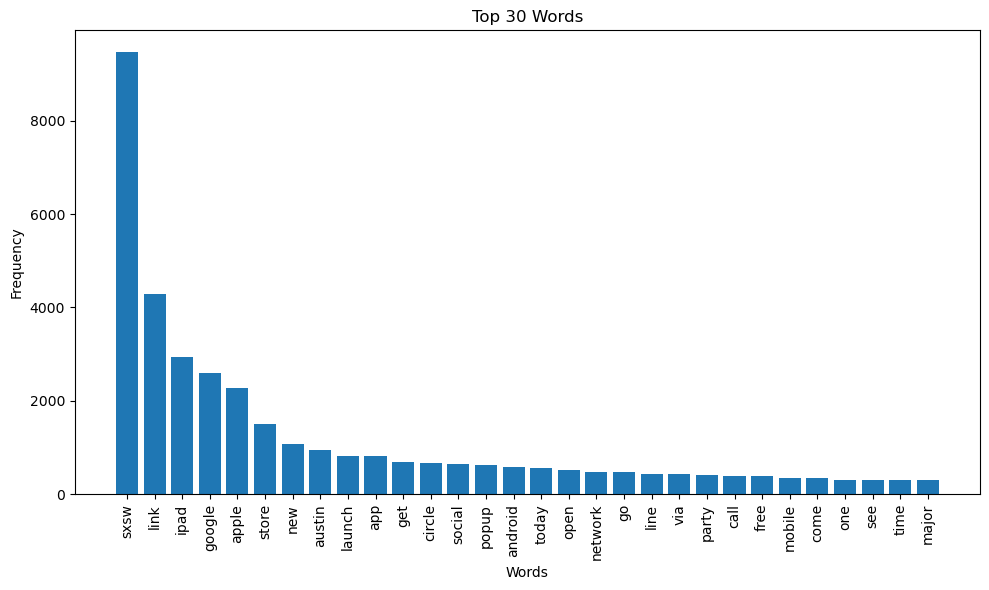

In [8]:
import matplotlib.pyplot as plt

# Top 10 words and their frequencies
top_words = word_counts.most_common(30)
words, frequencies = zip(*top_words)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


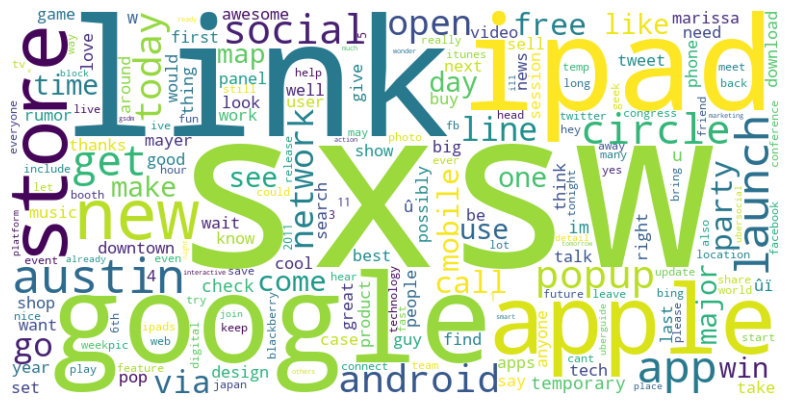

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Clean the text data
X_cleaned = clean_text(X, tokenizer, stopwords_list, remove_words)

# Tokenize the cleaned text
tokens = [token for tweet_tokens in X_cleaned for token in tokenizer.tokenize(tweet_tokens)]

# Remove the words specified for removal
tokens_filtered = [token for token in tokens if token not in remove_words]

# Create a frequency dictionary of the filtered words
word_freq = {}
for word in tokens_filtered:
    word_freq[word] = word_freq.get(word, 0) + 1

# Generate the word cloud based on the word frequency
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [15]:
# Train the Naive Bayes model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions using the Naive Bayes model
y_pred_nb = best_model.predict(X_test)

# Calculate evaluation metrics for the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)

# Print the evaluation metrics for the Naive Bayes model
print(f'Naive Bayes Accuracy: {accuracy_nb}')
print(f'Naive Bayes Precision: {precision_nb}')
print(f'Naive Bayes Recall: {recall_nb}')
print(f'Naive Bayes F1-score: {f1_nb}')

# Feature Importance Analysis
# Get the TfidfVectorizer component
tfidf_vectorizer = best_model.named_steps['tfidf']

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the trained Naive Bayes classifier
naive_bayes_classifier = best_model.named_steps['classifier']

# Get the feature importance scores
feature_importance_scores = naive_bayes_classifier.coef_

# Create a dataframe to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_scores[0]})

# Sort the dataframe by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 features with their importance scores
print("Top 10 Features:")
print(feature_importance_df.head(10))


Naive Bayes Accuracy: 0.6633109619686801
Naive Bayes Precision: 0.6546025155834508
Naive Bayes Recall: 0.6633109619686801
Naive Bayes F1-score: 0.6520702721062228


AttributeError: 'MultinomialNB' object has no attribute 'coef_'

In [17]:
# Train the Naive Bayes model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions using the Naive Bayes model
y_pred_nb = best_model.predict(X_test)

# Calculate evaluation metrics for the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted', zero_division=1.0)

# Print the evaluation metrics for the Naive Bayes model
print(f'Naive Bayes Accuracy: {accuracy_nb}')
print(f'Naive Bayes Precision: {precision_nb}')
print(f'Naive Bayes Recall: {recall_nb}')
print(f'Naive Bayes F1-score: {f1_nb}')

# Feature Importance Analysis
# Get the TfidfVectorizer component
tfidf_vectorizer = best_model.named_steps['tfidf']

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the trained Naive Bayes classifier
naive_bayes_classifier = best_model.named_steps['classifier']

# Get the log probabilities of features for each class
log_probabilities = naive_bayes_classifier.feature_log_prob_

# Calculate the feature importance scores
feature_importance_scores = log_probabilities[1] - log_probabilities[0]

# Create a dataframe to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_scores})

# Sort the dataframe by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 features with their importance scores
print("Top 10 Features:")
print(feature_importance_df.head(10))


Naive Bayes Accuracy: 0.6633109619686801
Naive Bayes Precision: 0.6546025155834508
Naive Bayes Recall: 0.6633109619686801
Naive Bayes F1-score: 0.6520702721062228
Top 10 Features:
               Feature  Importance
9782          downtown    4.038062
9787   downtown austin    3.952880
32741   store downtown    3.863272
19263      launch link    3.681932
23989            music    3.681499
12466             free    3.532288
29687      rumor apple    3.498003
10763            event    3.400237
7489          congress    3.391029
2767         apple set    3.294212


In [25]:
# Create the pipeline for the Naive Bayes model with n-gram range limited to unigrams
nb_pipeline = Pipeline([
    ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1))),
    ('classifier', MultinomialNB())
])

# ... Rest of the code ...

# Train the Naive Bayes model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions using the Naive Bayes model
y_pred_nb = best_model.predict(X_test)

# ... Rest of the code ...


Top 10 Features for Negative emotion:
               Feature  Negative emotion
0                 0011         10.996209
25994   panhandle ipad         10.996209
25974       panel rock         10.996209
25975        panel row         10.996209
25976        panel say         10.996209
25977      panel start         10.996209
25979       panel sxsw         10.996209
25980  panel tapworthy         10.996209
25981      panel today         10.996209
25982   panel tomorrow         10.996209

Top 10 Features for No emotion toward brand or product:
             Feature  No emotion toward brand or product
29048       religion                           12.320647
21011        mac wow                           12.320647
10970     ex ability                           12.320647
32228  sponsor apple                           12.320647
36294      tnx apple                           12.320647
10973       ex steal                           12.320647
32231  sponsor masha                           12.32064

- Negative feature importance values in Naive Bayes indicate that the presence of the feature decreases the likelihood of the corresponding class. Features with more negative values have a stronger negative impact on the class prediction.

- It's important to note that in Naive Bayes, the magnitude of the feature importance scores is what matters rather than the sign. You can take the absolute values of the scores to focus on the magnitude and compare the importance of features across different classes.

# 'mention' is when a user mentions another user by including their username preceded by the '@' symbol, it is referred to as a mention. For instance, a tweet like "I love the new features of @Flatiron" is a mention of the username
